# Business Problem Statement: 
Housing prices are an important reflection of the economy, and housing price ranges are of great interest for both buyers and sellers . Ask a home buyer to describe their dream house, and they probably won’t begin with the height of the basement ceiling or the proximity to an east-west railroad.

In websites we can see lot of
inconsistencies in terms of pricing of an apartment and there are some cases when
similar apartments are priced differently and thus there is lot of in-transparency. 
Proper and justified prices of
properties can bring in a lot of transparency and trust back to the real estate industry,
which is very important as for most consumers 

The business application of this algorithm is that websites can directly use
this algorithm to predict prices of new properties that are going to be listed by taking
some input variables and predicting the correct and justified price

## Objective:

### To predict the sale prices for the houses in King County

### Importing essential libraries

In [285]:
import numpy as np #linear algebra
import pandas as pd #datapreprocessing, CSV file I/O
import seaborn as sns #for plotting graphs
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model

### Reading Dataset

In [286]:
df = pd.read_csv("wk3_kc_house_train_data.csv")
df_val =  pd.read_csv("wk3_kc_house_valid_data.csv")

In [287]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


#### By observing the data we can see that the PRICE is dependent on various features

In [288]:
#Checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
id               9761 non-null int64
date             9761 non-null object
price            9761 non-null float64
bedrooms         9761 non-null int64
bathrooms        9761 non-null float64
sqft_living      9761 non-null int64
sqft_lot         9761 non-null int64
floors           9761 non-null float64
waterfront       9761 non-null int64
view             9761 non-null int64
condition        9761 non-null int64
grade            9761 non-null int64
sqft_above       9761 non-null int64
sqft_basement    9761 non-null int64
yr_built         9761 non-null int64
yr_renovated     9761 non-null int64
zipcode          9761 non-null int64
lat              9761 non-null float64
long             9761 non-null float64
sqft_living15    9761 non-null int64
sqft_lot15       9761 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 1.6+ MB


In [289]:
#Describing the data and analyzing the statistical parameters
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [290]:
df.shape

(9761, 21)

In [291]:
# Checking null values in the dataset
# NO NULL VALUES

df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Finding the counts of  bedroom,waterfront,grade and condition

In [292]:
df.bedrooms.value_counts()

3     4417
4     3094
2     1255
5      755
6      116
1       88
7       17
8        7
0        6
9        3
11       1
10       1
33       1
Name: bedrooms, dtype: int64

In [293]:
df.waterfront.value_counts()

0    9679
1      82
Name: waterfront, dtype: int64

In [294]:
df.grade.value_counts()

7     4067
8     2707
9     1192
6      914
10     532
11     172
5      107
12      45
4       17
13       7
1        1
Name: grade, dtype: int64

In [295]:
df.condition.value_counts()

3    6291
4    2610
5     772
2      78
1      10
Name: condition, dtype: int64

#### Using Seaborn, A countplot is plotted for bedrooms

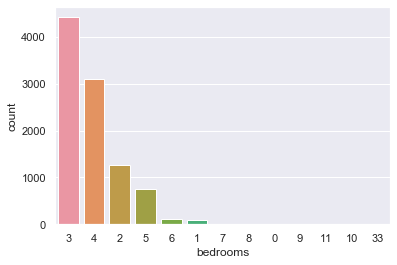

In [296]:
sns.countplot(df.bedrooms,order=df['bedrooms'].value_counts().index)

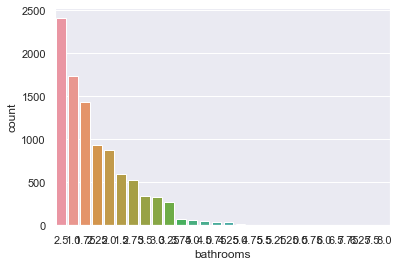

In [297]:
sns.countplot(df.bathrooms,order=df['bathrooms'].value_counts().index)

#### Using Seaborn,A barplot is plotted between the sqft above and prices to see how the price changes with the sqft above.

No handles with labels found to put in legend.


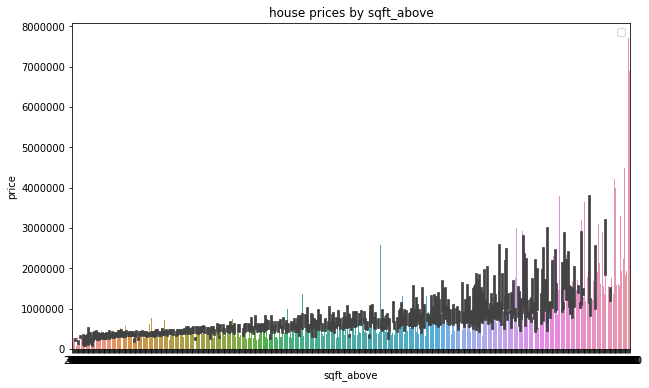

In [15]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,6))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='sqft_above',y='price',data=df)

### Scatter plot for all the features in the dataset w.r.t  PRICE.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

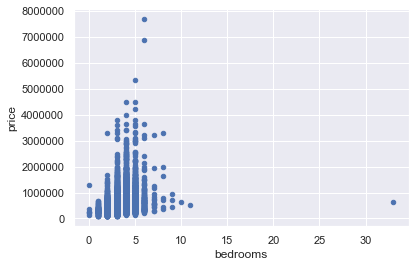

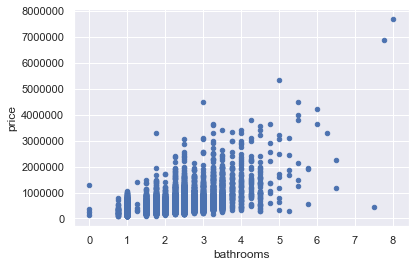

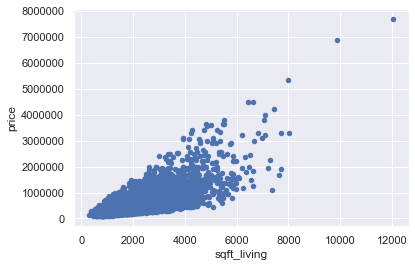

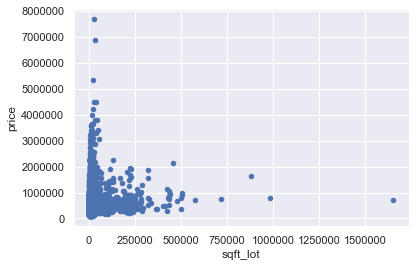

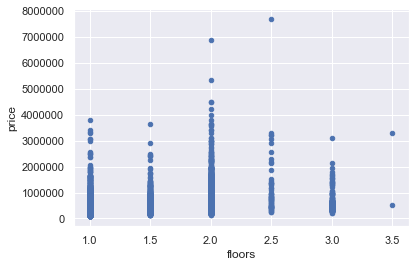

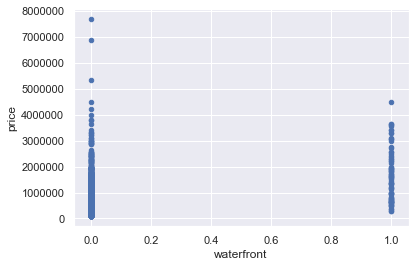

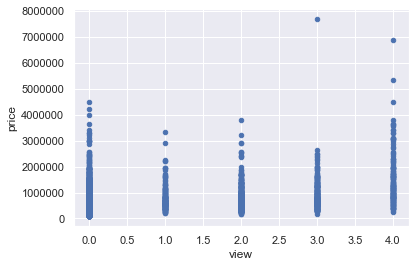

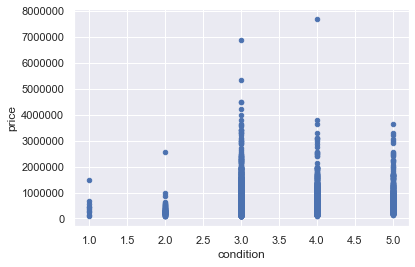

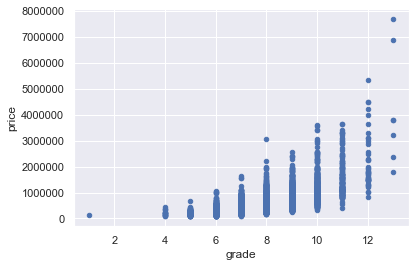

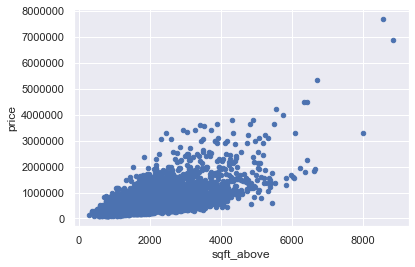

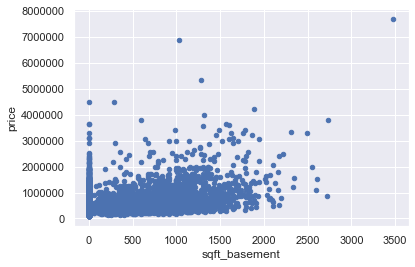

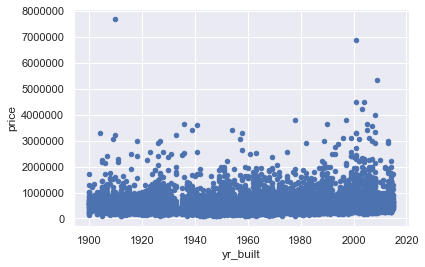

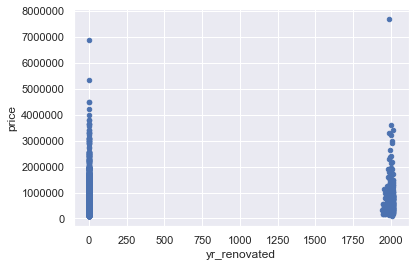

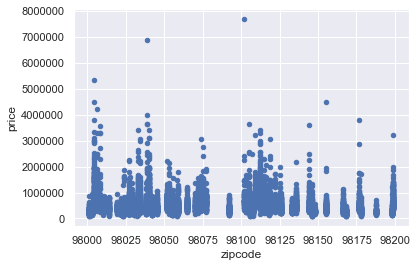

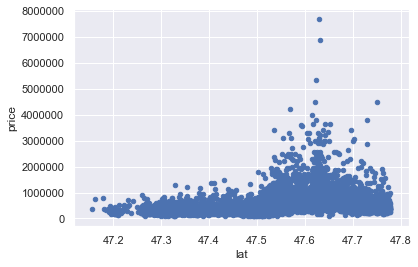

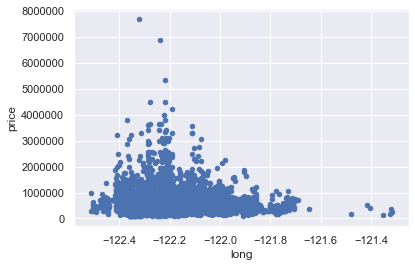

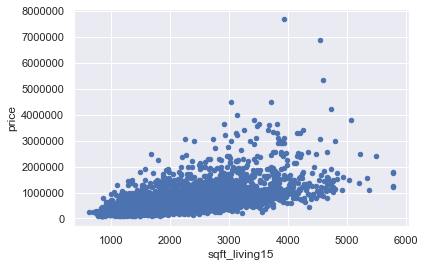

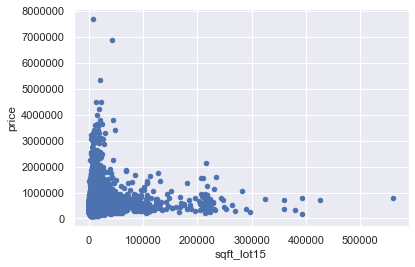

In [299]:
for i in df.iloc[:,2:]:
    if i=='price':continue
    df.plot(kind='scatter',x=i,y='price')

#### A histogram is plotted for sqft living.


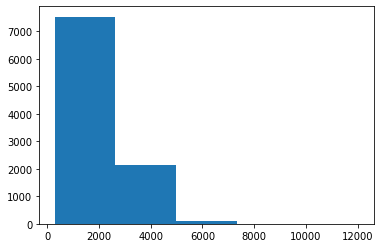

In [16]:
plt.hist('sqft_living',data=df,bins=5)
plt.show()

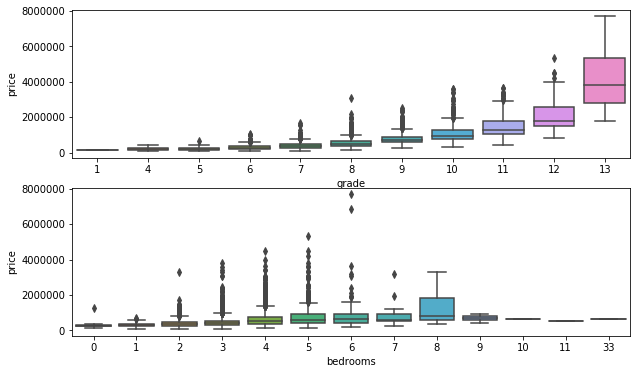

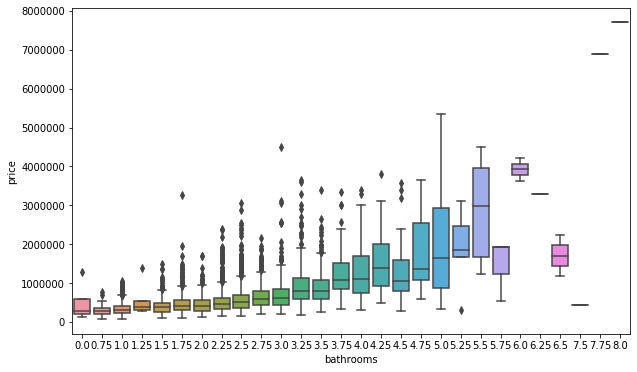

In [17]:
fig,ax=plt.subplots(2,1,figsize=(10,6))
sns.boxplot(x=df['grade'],y=df['price'],ax=ax[0])
sns.boxplot(x=df['bedrooms'],y=df['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(10,6))
sns.boxplot(x=df['bathrooms'],y=df['price'])

C:\Users\balla\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


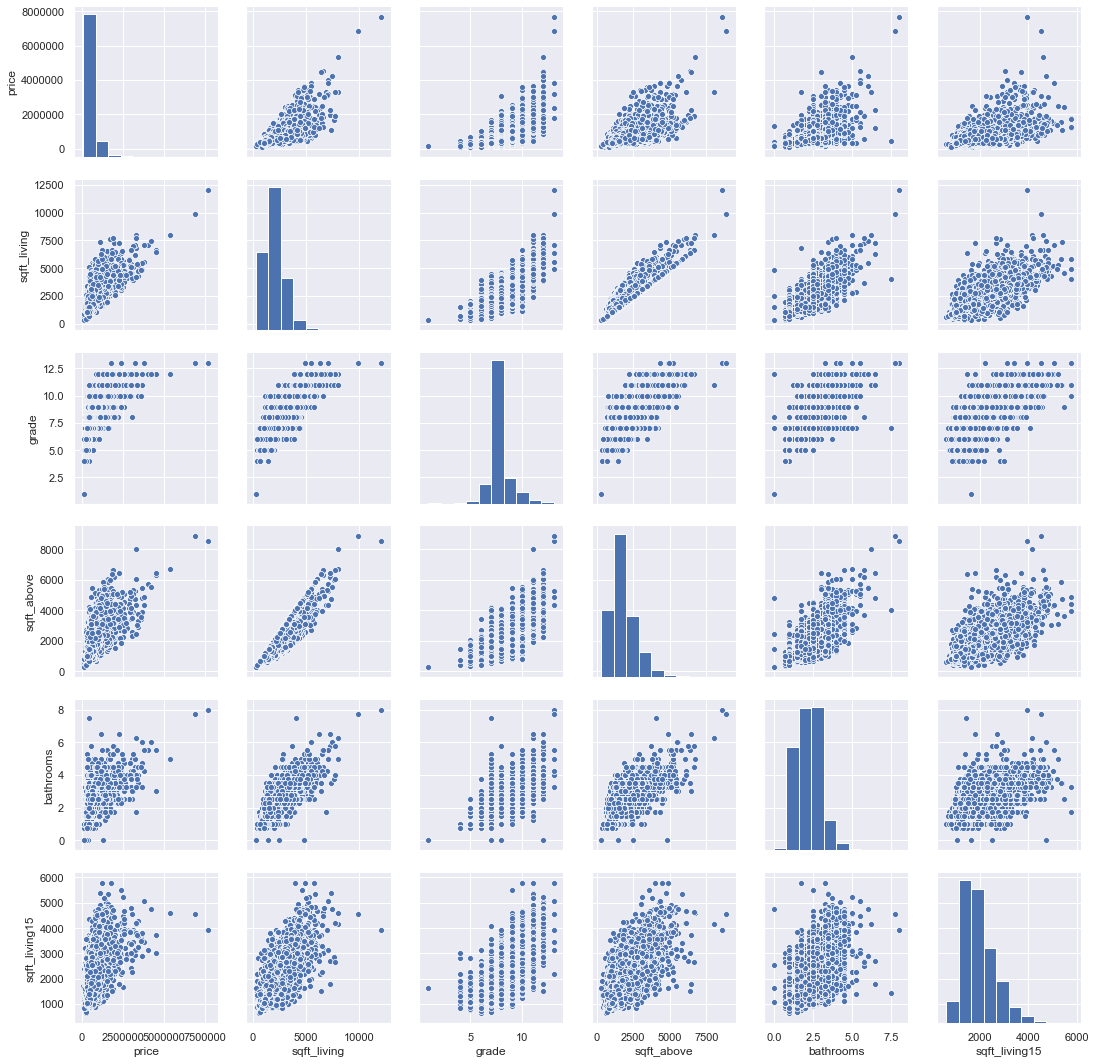

In [18]:
sns.set()
cols = df[['price','sqft_living','grade','sqft_above','bathrooms','sqft_living15']]
sns.pairplot(cols, size = 2.5)

#### Using distplot to check the skewness of sqft living and sqft above

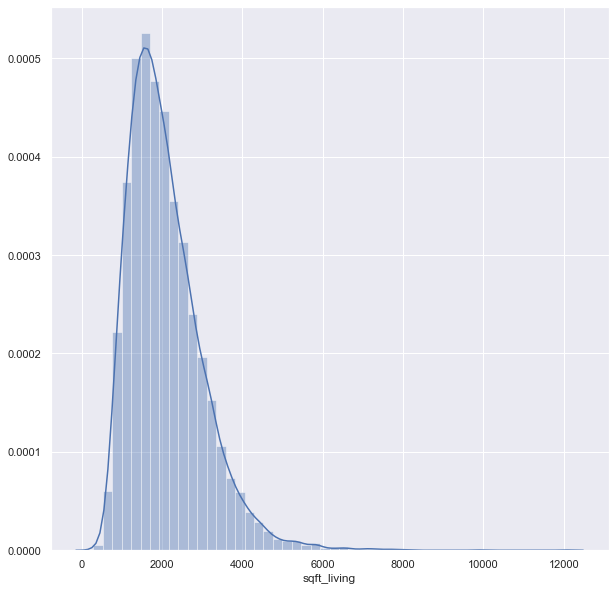

In [19]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
sns.distplot(df['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)

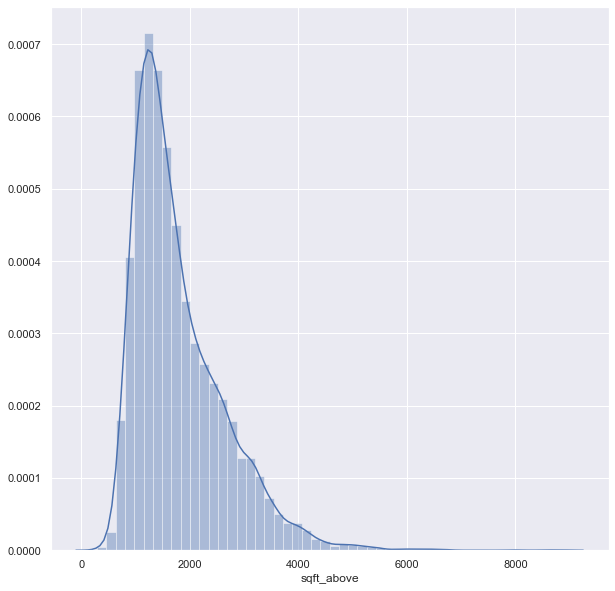

In [20]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
sns.distplot(df['sqft_above'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)

In [21]:
print('The skewness of the variable sqft_living is',df['sqft_living'].skew())
print('The skewness of the variable sqft_living is',df['sqft_above'].skew())

The skewness of the variable sqft_living is 1.425825591484237
The skewness of the variable sqft_living is 1.4527483169440447


In [22]:
print('Mean',round(df['sqft_living'].mean(),2))
print('Median',df['sqft_living'].median())
print('Mode',df['sqft_living'].mode()[0])

Mean 2086.73
Median 1910.0
Mode 1560


In [23]:
len(df[df['sqft_living']==1560])

68

#### We can observe that sqft living=1560 has more values.


In [24]:
corr= df.corr()
corr.style.background_gradient(cmap='BrBG')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1,-0.00597204,-0.00257051,0.0058213,-0.00755894,-0.130303,0.00779336,0.000834268,0.0233551,-0.015321,0.012491,-0.00644745,-0.00366022,0.0270526,-0.0249002,-0.0121304,0.00916729,0.0343951,-0.00131528,-0.137562
price,-0.00597204,1,0.300808,0.527532,0.705052,0.0941428,0.262954,0.274977,0.399658,0.0447321,0.665567,0.611453,0.322383,0.0517586,0.120472,-0.0556285,0.29928,0.0237538,0.584807,0.0779427
bedrooms,-0.00257051,0.300808,1,0.50607,0.560989,0.0288952,0.181042,-0.0068033,0.0798632,0.0361347,0.342305,0.462514,0.301829,0.155102,0.0186254,-0.148339,-0.0105474,0.117168,0.376457,0.0181492
bathrooms,0.0058213,0.527532,0.50607,1,0.75893,0.0794345,0.501899,0.061483,0.182988,-0.115382,0.660925,0.692911,0.281433,0.499589,0.0447558,-0.201454,0.0184528,0.217697,0.566076,0.0687217
sqft_living,-0.00755894,0.705052,0.560989,0.75893,1,0.162786,0.366219,0.0972028,0.285735,-0.0479379,0.764819,0.878989,0.435069,0.322723,0.0436265,-0.203761,0.0548302,0.24017,0.758081,0.163545
sqft_lot,-0.130303,0.0941428,0.0288952,0.0794345,0.162786,1,-0.00354279,0.0294203,0.0992213,-0.00872229,0.115611,0.180913,-0.000601366,0.0540433,0.0012194,-0.126091,-0.0922451,0.224524,0.145285,0.719922
floors,0.00779336,0.262954,0.181042,0.501899,0.366219,-0.00354279,1,0.0224426,0.0319376,-0.26539,0.461545,0.534801,-0.242675,0.481926,0.0136554,-0.0644794,0.0448271,0.134683,0.289238,-0.0132687
waterfront,0.000834268,0.274977,-0.0068033,0.061483,0.0972028,0.0294203,0.0224426,1,0.402725,0.0240303,0.0880391,0.0642969,0.0822138,-0.0270099,0.101684,0.0236561,-0.00940991,-0.0392269,0.0971959,0.0284995
view,0.0233551,0.399658,0.0798632,0.182988,0.285735,0.0992213,0.0319376,0.402725,1,0.0599694,0.258123,0.170286,0.277021,-0.0563612,0.10975,0.0758336,0.00550317,-0.0746299,0.292435,0.079904
condition,-0.015321,0.0447321,0.0361347,-0.115382,-0.0479379,-0.00872229,-0.26539,0.0240303,0.0599694,1,-0.133313,-0.153713,0.189828,-0.357396,-0.0555251,0.00341022,-0.0176217,-0.106514,-0.0804234,0.00225317


### Using seaborn, plotting a heatmap to check the correlation between all the features

# Simple Linear Regression

In [26]:
reg= linear_model.LinearRegression()
x_train= np.array(df['sqft_living']).reshape(-1,1)
y_train=np.array(df['price']).reshape(-1,1)
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
x_valid=np.array(df_val['sqft_living']).reshape(-1,1)
y_valid=np.array(df_val['price']).reshape(-1,1)
pred=reg.predict(x_valid)
print('LINEAR MODEL')
mean_squared_error=metrics.mean_squared_error(y_valid,pred)
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error),2))
print('R squared training:',round(reg.score(x_train,y_train),3))
print('R squared Validation:',round(reg.score(x_valid,y_valid),3) )
print('Intercept:',reg.intercept_)
print('Coefficient:',reg.coef_)

LINEAR MODEL
Root Mean Squared Error: 255524.92
R squared training: 0.497
R squared Validation: 0.485
Intercept: [-59493.31716521]
Coefficient: [[288.59846375]]


### R Squared value: 0.485

#### Intercept: -59493.31716521, Coefficient: 288.59846375,R2 value: 0.485,
#### We can interpret above results as , the increase in 1 sqft area of house will increse the price of house by 288.59 USD

#### The root mean square error is found to be 255524.92

#### R2 value = 0.485
#### Which indicated that 49% of variability of price variable is explained by this model. 

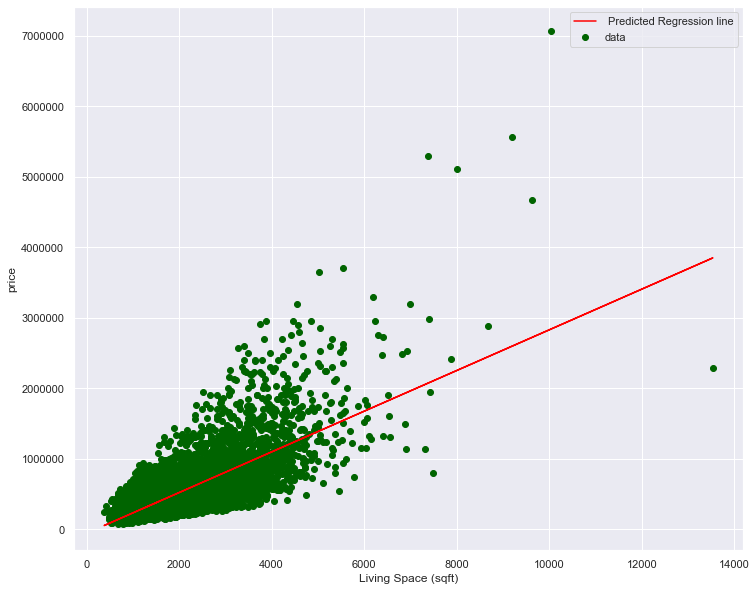

In [28]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_valid, y_valid, color= 'darkgreen', label = 'data')
plt.plot(x_valid, reg.predict(x_valid), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()

plt.show()

# Multiple Linear Regression

### MODEL 00

In [275]:
df = pd.read_csv("wk3_kc_house_train_data.csv")
df_val =  pd.read_csv("wk3_kc_house_valid_data.csv")

In [276]:
df['price_log'] = np.log(df.price)
df['sqft_living_log'] = np.log(df.sqft_living)
df['sqft_lot_log'] = np.log(df.sqft_lot)
df['sqft_above_log'] = np.log(df.sqft_above)


In [277]:
df_val['price_log'] = np.log(df_val.price)
df_val['sqft_living_log'] = np.log(df_val.sqft_living)
df_val['sqft_lot_log'] = np.log(df_val.sqft_lot)
df_val['sqft_above_log'] = np.log(df_val.sqft_above)

In [278]:
unwanted = ['id','date','price','sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_above','yr_built','yr_renovated','zipcode','lat','long']
df.drop(unwanted,axis=1,inplace=True)

In [279]:
unwanted = ['id','date','price','sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_above','yr_built','yr_renovated','zipcode','lat','long']
df_val.drop(unwanted,axis=1,inplace=True)

In [280]:
df.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_basement', 'price_log', 'sqft_living_log',
       'sqft_lot_log', 'sqft_above_log'],
      dtype='object')

In [32]:
X = df.drop(["price_log"], axis = 1)
y = df['price_log']

In [37]:
X_val = df_val.drop(["price_log"], axis = 1)
y_val = df_val['price_log']

In [56]:
reg= linear_model.LinearRegression()
reg.fit(X,y)
pred = reg.predict(X_val)
print('MULTI LINEAR REGRESSION MODEL')
mean_squared_error = metrics.mean_squared_error(np.exp(y_val), np.exp(pred))
print('Root Mean Squared Error (RMSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(X,y), 3))
print('R-squared (Validation) ', round(reg.score(X_val,y_val), 3))

MULTI LINEAR REGRESSION MODEL
Root Mean Squared Error (RMSE)  214287.71
R-squared (training)  0.604
R-squared (Validation)  0.593


### R Squared Value: 0.593

#### The root mean square error is found to be 214287.71


### MODEL 01

In [247]:
df1 = pd.read_csv("wk3_kc_house_train_data.csv")
df_val1 =  pd.read_csv("wk3_kc_house_valid_data.csv")

In [248]:
df1['price_log'] = np.log(df1.price)

In [249]:
df_val1['price_log'] = np.log(df_val1.price)

In [250]:
unwanted = ['id','date','price','yr_built','yr_renovated','zipcode','lat','long']
df1.drop(unwanted,axis=1,inplace=True)

In [281]:
unwanted = ['id','date','price','yr_built','yr_renovated','zipcode','lat','long']
df_val1.drop(unwanted,axis=1,inplace=True)

In [282]:
X1 = df1.drop(["price_log"], axis = 1)
y1 = df1['price_log']

In [283]:
X_val1 = df_val1.drop(["price_log"], axis = 1)
y_val1 = df_val1['price_log']

In [284]:
reg1= linear_model.LinearRegression()
reg1.fit(X1,y1)
pred1 = reg1.predict(X_val1)
print('MULTI LINEAR REGRESSION MODEL')
mean_squared_error = metrics.mean_squared_error(np.exp(y_val1), np.exp(pred1))
print('Root Mean Squared Error (RMSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg1.score(X1,y1), 3))
print('R-squared (Validation) ', round(reg1.score(X_val1,y_val1), 3))

MULTI LINEAR REGRESSION MODEL
Root Mean Squared Error (RMSE)  238237.21
R-squared (training)  0.61
R-squared (Validation)  0.597


### R Squared Value: 0.597

#### The root mean square error is found to be 238237.21



### MODEL 02

In [253]:
df2 = pd.read_csv("wk3_kc_house_train_data.csv")
df_val2 =  pd.read_csv("wk3_kc_house_valid_data.csv")

In [255]:
df2['age'] = 2020 - df2.yr_built
df2['price_log'] = np.log(df2.price)
df2['sqft_living_log'] = np.log(df2.sqft_living)
df2['sqft_lot_log'] = np.log(df2.sqft_lot)
df2['sqft_living15_log'] = np.log(df2.sqft_living15)
df2['sqft_lot15_log'] = np.log(df2.sqft_lot15)
df2['sqft_above_log'] = np.log(df2.sqft_above)

In [256]:
df_val2['age'] = 2020 - df_val2.yr_built
df_val2['price_log'] = np.log(df_val2.price)
df_val2['sqft_living_log'] = np.log(df_val2.sqft_living)
df_val2['sqft_lot_log'] = np.log(df_val2.sqft_lot)
df_val2['sqft_living15_log'] = np.log(df_val2.sqft_living15)
df_val2['sqft_lot15_log'] = np.log(df_val2.sqft_lot15)
df_val2['sqft_above_log'] = np.log(df_val2.sqft_above)

In [257]:
sort = df2['sqft_basement'] >= 1
df2.loc[sort, 'sqft_basement_bin'] = 1

sort = df2['sqft_basement'] < 1
df2.loc[sort, 'sqft_basement_bin'] = 0

In [258]:
mask = df_val2['sqft_basement'] >= 1
df_val2.loc[mask, 'sqft_basement_bin'] = 1

mask = df_val2['sqft_basement'] < 1
df_val2.loc[mask, 'sqft_basement_bin'] = 0

In [259]:
unwanted = ['id','date','price','sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long']
df2.drop(unwanted,axis=1,inplace=True)

In [260]:
unwanted = ['id','date','price','sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long']
df_val2.drop(unwanted,axis=1,inplace=True)

In [261]:
df2.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'age', 'price_log', 'sqft_living_log', 'sqft_lot_log',
       'sqft_living15_log', 'sqft_lot15_log', 'sqft_above_log',
       'sqft_basement_bin'],
      dtype='object')

In [103]:
X2 = df2.drop(["price_log"], axis = 1)
y2 = df2['price_log']

In [104]:
X_val2 = df_val2.drop(["price_log"], axis = 1)
y_val2 = df_val2['price_log']

In [105]:
reg2= linear_model.LinearRegression()
reg2.fit(X2,y2)
pred2 = reg2.predict(X_val2)
print('MULTI LINEAR REGRESSION MODEL')
mean_squared_error = metrics.mean_squared_error(np.exp(y_val2), np.exp(pred2))
print('Root Mean Squared Error (RMSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg2.score(X2,y2), 3))
print('R-squared (Validation) ', round(reg2.score(X_val2,y_val2), 3))

MULTI LINEAR REGRESSION MODEL
Root Mean Squared Error (RMSE)  197343.98
R-squared (training)  0.672
R-squared (Validation)  0.66


### R Squared Value: 0.66

#### The root mean square error is found to be 197343.98


### MODEL 03

In [262]:
df3 = pd.read_csv("wk3_kc_house_train_data.csv")
df_val3 =  pd.read_csv("wk3_kc_house_valid_data.csv")

In [263]:
df3['price_log'] = np.log(df3.price)
df3['sqft_living_log'] = np.log(df3.sqft_living)
df3['sqft_lot_log'] = np.log(df3.sqft_lot)
df3['sqft_living15_log'] = np.log(df3.sqft_living15)
df3['sqft_lot15_log'] = np.log(df3.sqft_lot15)
df3['sqft_above_log'] = np.log(df3.sqft_above)

In [264]:
df_val3['price_log'] = np.log(df_val3.price)
df_val3['sqft_living_log'] = np.log(df_val3.sqft_living)
df_val3['sqft_lot_log'] = np.log(df_val3.sqft_lot)
df_val3['sqft_living15_log'] = np.log(df_val3.sqft_living15)
df_val3['sqft_lot15_log'] = np.log(df_val3.sqft_lot15)
df_val3['sqft_above_log'] = np.log(df_val3.sqft_above)

In [265]:
sort = df3['sqft_basement'] >= 1
df3.loc[sort, 'sqft_basement_bin'] = 1

sort = df3['sqft_basement'] < 1
df3.loc[sort, 'sqft_basement_bin'] = 0

In [266]:
mask = df_val3['sqft_basement'] >= 1
df_val3.loc[mask, 'sqft_basement_bin'] = 1

mask = df_val3['sqft_basement'] < 1
df_val3.loc[mask, 'sqft_basement_bin'] = 0

In [216]:
zipcode_dummy = pd.get_dummies(df3['zipcode'])

In [217]:
zipcode_dummy1 = pd.get_dummies(df_val3['zipcode'])

In [218]:
df4 = pd.concat([df3, zipcode_dummy], axis=1)

In [219]:
df_val4 = pd.concat([df_val3, zipcode_dummy1], axis=1)

In [220]:
unwanted = ['id','date','price','bedrooms','bathrooms','floors','condition','sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long']
df4.drop(unwanted,axis=1,inplace=True)

In [221]:
unwanted = ['id','date','price','bedrooms','bathrooms','floors','condition','sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long']
df_val4.drop(unwanted,axis=1,inplace=True)

In [222]:
X3 = df4.drop(["price_log"], axis = 1)
y3 = df4['price_log']

In [223]:
X_val3 = df_val4.drop(["price_log"], axis = 1)
y_val3 = df_val4['price_log']

In [246]:
reg3= linear_model.LinearRegression()
reg3.fit(X3,y3)
pred3 = reg3.predict(X_val3)
print('MULTI LINEAR REGRESSION MODEL')
mean_squared_error = metrics.mean_squared_error(np.exp(y_val3), np.exp(pred3))
print('Root Mean Squared Error (RMSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg3.score(X3,y3), 3))
print('R-squared (Validation) ', round(reg3.score(X_val3,y_val3), 3))

MULTI LINEAR REGRESSION MODEL
Root Mean Squared Error (RMSE)  123708.39
R-squared (training)  0.883
R-squared (Validation)  0.873


### R Squared Value: 0.873

#### The root mean square error is found to be 123708.39

### MULTI VARIATE REGRESSION - MODEL 03 is the BEST SOLUTION


### Using the test data for TESTING on Multivariate regression - model 03

In [267]:
df_test = pd.read_csv("wk3_kc_house_test_data.csv")

In [268]:
df_test['price_log'] = np.log(df_test.price)
df_test['sqft_living_log'] = np.log(df_test.sqft_living)
df_test['sqft_lot_log'] = np.log(df_test.sqft_lot)
df_test['sqft_living15_log'] = np.log(df_test.sqft_living15)
df_test['sqft_lot15_log'] = np.log(df_test.sqft_lot15)
df_test['sqft_above_log'] = np.log(df_test.sqft_above)

In [269]:
sort = df_test['sqft_basement'] >= 1
df_test.loc[sort, 'sqft_basement_bin'] = 1

sort = df_test['sqft_basement'] < 1
df_test.loc[sort, 'sqft_basement_bin'] = 0

In [270]:
zipcode_dummy2 = pd.get_dummies(df_test['zipcode'])

In [271]:
df_test = pd.concat([df_test, zipcode_dummy2], axis=1)

In [272]:
unwanted = ['id','date','price','bedrooms','bathrooms','floors','condition','sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long']
df_test.drop(unwanted,axis=1,inplace=True)

In [240]:
X_test = df_test.drop(["price_log"], axis = 1)
y_test = df_test['price_log']

In [241]:
pred3 = reg3.predict(X_test)
print('MULTI LINEAR REGRESSION MODEL')
mean_squared_error = metrics.mean_squared_error(np.exp(y_test), np.exp(pred3))
print('Root Mean Squared Error (RMSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (Testing) ', round(reg3.score(X_test,y_test), 3))

MULTI LINEAR REGRESSION MODEL
Root Mean Squared Error (RMSE)  128360.88
R-squared (Testing)  0.873


### R Squared Value (TEST): 0.873

#### The root mean square error(TEST) is found to be 123708.39